In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [154]:
accidents_csv = "US_Accidents_Dec21_updated.csv"
weather_csv = "WeatherEvents_Jan2016-Dec2021.csv"

In [155]:
df_acc = pd.read_csv(f"{accidents_csv}")

In [156]:
df_wea = pd.read_csv(f"{weather_csv}")

In [157]:
df_wea.columns

Index(['EventId', 'Type', 'Severity', 'StartTime(UTC)', 'EndTime(UTC)',
       'Precipitation(in)', 'TimeZone', 'AirportCode', 'LocationLat',
       'LocationLng', 'City', 'County', 'State', 'ZipCode'],
      dtype='object')

In [158]:
df_acc.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [159]:
# California, North Dakota, New York, Texas
cities = ["TX", "CA"]
df_cities = df_acc[df_acc["State"].isin(cities)]

In [160]:
df_cities["Weather_Condition"]
wea = df_cities.groupby('Weather_Condition')

print(wea.groups.keys())
weather = ["Heavy Rain"]
df_rain = df_cities[df_cities["Weather_Condition"].isin(weather)]
df_rain

dict_keys(['Blowing Dust', 'Blowing Dust / Windy', 'Blowing Sand', 'Clear', 'Cloudy', 'Cloudy / Windy', 'Drizzle', 'Drizzle / Windy', 'Drizzle and Fog', 'Dust Whirls', 'Duststorm', 'Fair', 'Fair / Windy', 'Fog', 'Fog / Windy', 'Freezing Rain', 'Freezing Rain / Windy', 'Hail', 'Haze', 'Haze / Windy', 'Heavy Drizzle', 'Heavy Rain', 'Heavy Rain / Windy', 'Heavy Rain Shower', 'Heavy Rain Showers', 'Heavy Sleet', 'Heavy Snow', 'Heavy Snow / Windy', 'Heavy T-Storm', 'Heavy T-Storm / Windy', 'Heavy Thunderstorms and Rain', 'Light Drizzle', 'Light Drizzle / Windy', 'Light Fog', 'Light Freezing Drizzle', 'Light Freezing Fog', 'Light Freezing Rain', 'Light Haze', 'Light Ice Pellets', 'Light Rain', 'Light Rain / Windy', 'Light Rain Shower', 'Light Rain Shower / Windy', 'Light Rain Showers', 'Light Rain with Thunder', 'Light Sleet', 'Light Snow', 'Light Snow / Windy', 'Light Snow Showers', 'Light Snow and Sleet', 'Light Snow and Sleet / Windy', 'Light Snow with Thunder', 'Light Thunderstorms and R

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
2397,A-2398,2,2016-04-22 11:12:08,2016-04-22 17:12:08,37.321850,-121.891120,37.309960,-121.883460,0.923,At Alma Ave/Lelong St/Exit 4 - Accident. Left ...,...,False,False,False,False,False,False,Day,Day,Day,Day
2399,A-2400,2,2016-04-22 11:18:29,2016-04-22 17:18:29,37.316490,-121.967300,37.318130,-121.978380,0.619,At Saratoga Ave - Accident. Right lane blocked.,...,False,False,False,False,False,False,Day,Day,Day,Day
12172,A-12173,2,2016-12-05 04:51:08,2016-12-05 10:51:08,29.936785,-95.518843,29.936920,-95.515287,0.213,At TX-249 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
12194,A-12195,2,2016-12-05 06:38:53,2016-12-05 12:38:53,29.557034,-95.712610,29.554569,-95.724693,0.746,At Williams Way - Accident.,...,False,False,False,False,False,False,Night,Day,Day,Day
16115,A-16116,2,2017-01-13 07:43:04,2017-01-13 13:43:04,30.311310,-97.707220,30.313299,-97.704672,0.205,At Corona Dr - Accident.,...,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2802431,A-2802432,3,2019-06-05 07:50:28,2019-06-05 08:20:06,29.956950,-95.360008,29.956950,-95.360008,0.000,At Aldine Westfield Rd - Accident. Right lane ...,...,False,False,True,False,False,False,Day,Day,Day,Day
2802439,A-2802440,3,2019-06-05 08:39:12,2019-06-05 09:09:09,29.799610,-95.275760,29.794930,-95.269530,0.494,At US-90/McCarty Dr/Exit 24 - Accident. Right ...,...,False,False,False,False,False,False,Day,Day,Day,Day
2802440,A-2802441,3,2019-06-05 09:09:57,2019-06-05 09:39:05,29.658224,-95.387396,29.652160,-95.387600,0.419,At Reed Rd - Accident. Right lane blocked.,...,False,False,False,False,False,False,Day,Day,Day,Day
2842420,A-2842421,4,2019-08-17 16:41:17,2019-08-17 17:10:53,29.714910,-95.460290,29.712852,-95.460266,0.142,Closed between Fournace Pl/Exit 7/Exit 6 and B...,...,False,False,False,False,False,False,Day,Day,Day,Day


In [161]:
df_cities.shape

(944905, 47)

In [162]:
# Regression Line with scikit learn on scatter plot data
df_ca = df_rain.loc[df_rain['State'] == 'CA']

In [163]:
import pandas as pd
import numpy as np
np.random.seed(10)

remove_n = 3151
drop_indices = np.random.choice(df_ca.index, remove_n, replace=False)
df_ca = df_ca.drop(drop_indices)

In [164]:
df_ca.shape

(509, 47)

In [165]:
# Delete old CA vals from df_rain then add new ca rows
df_rain = df_rain[df_rain.State != 'CA']

In [166]:
df_rain.shape

(509, 47)

In [167]:
bigdata = df_rain.append(df_ca, ignore_index=True)

In [168]:
bigdata.shape

df_rain = bigdata

In [169]:
import datetime

df_rain["Start_Time"] = pd.to_datetime(df_rain["Start_Time"])
df_rain["End_Time"] = pd.to_datetime(df_rain["End_Time"])

df_rain["Traffic_Delay"] = df_rain["End_Time"] - df_rain["Start_Time"]
df_rain["Traffic_Delay"] = df_rain["Traffic_Delay"].apply(lambda x : x.total_seconds())
df_rain["Traffic_Delay"]

0       21600.0
1       21600.0
2       21600.0
3       21600.0
4       21600.0
         ...   
1013    21600.0
1014    21600.0
1015    21600.0
1016    21600.0
1017    21600.0
Name: Traffic_Delay, Length: 1018, dtype: float64

In [170]:
df_Test = df_rain.loc[df_rain['State'] == 'CA']
df_Test.shape

(509, 48)

In [171]:

dfdata = df_rain[['State', 'Traffic_Delay']]

[Text(0.5, 1.0, 'CA vs TX Traffic Delay Frequencies'), (0.0, 50000.0)]

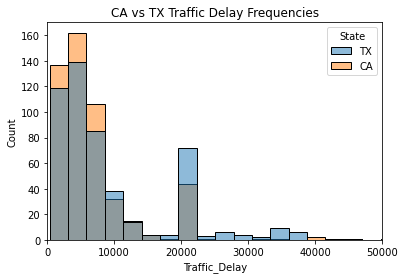

In [172]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#dfdata['Traffic_Delay'].hist(by=dfdata['State'], range=[0, 40000], bins=5, alpha=0.5)
sns.histplot(data = dfdata, x = 'Traffic_Delay', hue = "State", bins = 22).set(title='CA vs TX Traffic Delay Frequencies', xlim=(0,50000))


In [173]:
df_ca = df_rain.loc[df_rain['State'] == 'CA']
df_ca['Traffic_Delay'].mean()

7092.758349705305

In [174]:
df_tx = df_rain.loc[df_rain['State'] == 'TX']
df_tx['Traffic_Delay'].mean()

9539.809430255404

In [175]:
observed_difference = df_tx['Traffic_Delay'].mean() - df_ca['Traffic_Delay'].mean()
observed_difference

2447.051080550099

In [176]:
dfdata['Shuffle_Label'] = dfdata['State'].sample(frac=1).values
dfdata.head
#dfdata['Traffic_Delay'].hist(by=dfdata['State'], range=[0, 40000], bins=5, alpha=0.5)

<ipython-input-176-596cba46ef7a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfdata['Shuffle_Label'] = dfdata['State'].sample(frac=1).values


<bound method NDFrame.head of      State  Traffic_Delay Shuffle_Label
0       TX        21600.0            CA
1       TX        21600.0            TX
2       TX        21600.0            CA
3       TX        21600.0            CA
4       TX        21600.0            CA
...    ...            ...           ...
1013    CA        21600.0            TX
1014    CA        21600.0            CA
1015    CA        21600.0            CA
1016    CA        21600.0            CA
1017    CA        21600.0            CA

[1018 rows x 3 columns]>

In [177]:
def one_difference_simulated_means(dfdata):
    dfdata['Shuffle_Label'] = dfdata['State'].sample(frac=1).values
    df_ca = dfdata.loc[dfdata['Shuffle_Label'] == 'CA']
    df_tx = dfdata.loc[dfdata['Shuffle_Label'] == 'TX']
    observed_difference = df_tx['Traffic_Delay'].mean() - df_ca['Traffic_Delay'].mean()
    return observed_difference
    
    

In [178]:
print(one_difference_simulated_means(dfdata))

-488.2652259332026


<ipython-input-177-3db7aa1d5ac8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfdata['Shuffle_Label'] = dfdata['State'].sample(frac=1).values


In [179]:
differences = []

repetitions = 5000
for i in range(repetitions):
    new_difference = one_difference_simulated_means(dfdata)
    differences.append(new_difference)

<ipython-input-177-3db7aa1d5ac8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfdata['Shuffle_Label'] = dfdata['State'].sample(frac=1).values


In [180]:
differences

[-395.34970530451847,
 -607.4322200392926,
 181.4282907662091,
 847.8487229862476,
 -674.8781925343801,
 582.6895874263255,
 -336.0373280943022,
 -1065.8998035363447,
 838.7838899803537,
 792.1944990176817,
 -340.7799607072693,
 720.2652259332026,
 -56.24950884086502,
 690.1827111984276,
 -90.33988212180702,
 812.442043222004,
 -677.9155206286841,
 426.93320235756346,
 -824.583497053045,
 -683.3811394891936,
 -316.3516699410611,
 -133.4047151277009,
 55.47544204322185,
 246.41060903732796,
 -132.70137524557867,
 -132.3555992141446,
 192.18271119842757,
 389.5422396856584,
 439.5422396856584,
 -497.16110019646294,
 -430.980353634578,
 495.0039292730844,
 12.607072691553185,
 -159.34970530451756,
 -8.422396856582054,
 666.9724950884083,
 -61.99410609037295,
 -618.6385068762283,
 -193.70726915520572,
 -750.7013752455796,
 -621.0078585461697,
 -1888.2416502946953,
 51.45579567780078,
 28.19056974459818,
 55.96267190569779,
 -9.754420432218467,
 387.56974459725006,
 -459.18467583497113,
 -1

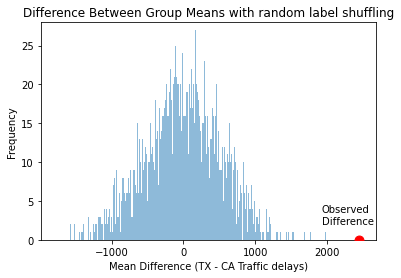

-7.557478192534375
2447.051080550099


In [181]:
import numpy as np
import random
from matplotlib import pyplot as plt

data = differences

# fixed bin size
bins = np.arange(-2000, 2000, 5) # fixed bin size

plt.xlim([min(data)-5, max(data)+700])
plt.ylim(0,28)
plt.hist(data, bins=bins, alpha=0.5)
plt.title('Difference Between Group Means with random label shuffling')
plt.xlabel('Mean Difference (TX - CA Traffic delays)')
plt.ylabel('Frequency')
plt.scatter(2447.05, 0, color='red', s=80, zorder=4, label="Test")
plt.annotate("Observed", xy = (1930, 3.5), xytext = (0, 0), textcoords = 'offset points')
plt.annotate("Difference", xy = (1930, 2), xytext = (0, 0), textcoords = 'offset points')

plt.show()
print(sum(differences) / len(differences))
print(observed_difference)

In [182]:
# Inconsistent with observed difference, this favors the alternative hypothesis ^^^


In [183]:
df_acc.shape

(2845342, 47)

In [184]:
df_rain = df_acc.loc[df_acc['Weather_Condition'] == 'Light Rain']
df_rain.shape
df_fair = df_acc.loc[df_acc['Weather_Condition'] == "Fair"]
df_fair.shape

(1107194, 47)

In [185]:
df_state = df_rain.loc[df_rain['State'] == 'CA']
df_state.shape[0] 
# (26417 / 39510000) * 1000
# 0.7

# 90 / 1934000  * 1000
# 0.047

26417

In [186]:
state_data = {
    "AL":4900000,
    "AK":731545,
    "AZ":7279000,
    "CA":39510000,
    "CO":5759000,
    "CT":3565000,
    "DE":973764,
    "FL":21480000,
    "GA":10620000,
    "HI":1416000,
    "ID":1787000,
    "IL":12670000,
    "IN":6732000,
    "IA":3155000,
    "KS":2913000,
    "KY":4468000,
    "LA":4649000,
    "ME":1344000,
    "MD":6046000,
    "MA":6893000,
    "MI":9987000,
    "MN":5640000,
    "MS":2976000,
    "MO":6137000,
    "MT":1069000,
    "NE":1934000,
    "NV":3080000,
    "NH":1360000,
    "NJ":8882000,
    "NM":2097000,
    "NY":8419000,
    "NC":10490000,
    "ND":762062,
    "OH":11690000,
    "OK":3957000,
    "OR":4218000,
    "PA":12800000,
    "RI":1059000,
    "SC":5149000,
    "SD":884659,
    "TN":6829000,
    "TX":29000000,
    "UT":3206000,
    "VT":623989,
    "VA":8536000,
    "WA":7615000,
    "WV":1792000,
    "WI":5822000,
    "WY":578759
}

scatter_data_rain = []
scatter_data_fair = []

def state_point_calc(df, state_name, pop):
    df_state = df.loc[df['State'] == state_name]
    yval = (df_state.shape[0] / pop) * 1000
    if yval == 0:
        return None
    xval = pop
    return [state_name, xval, yval]

for state in state_data:
    state_name = state
    pop = state_data[state]
    temp_data = state_point_calc(df_rain, state_name, pop)
    temp_data2 = state_point_calc(df_fair, state_name, pop)
    if temp_data == None or temp_data2 == None:
        continue
    scatter_data_rain.append(temp_data)
    scatter_data_fair.append(temp_data2)
    


scatter_data_rain
scatter_data_fair
    


[['AL', 4900000, 1.5987755102040817],
 ['AZ', 7279000, 4.5118835004808355],
 ['CA', 39510000, 10.168868640850418],
 ['CO', 5759000, 1.0802222608091683],
 ['CT', 3565000, 3.023001402524544],
 ['DE', 973764, 2.2048463488073082],
 ['FL', 21480000, 7.623510242085661],
 ['GA', 10620000, 1.0270244821092278],
 ['ID', 1787000, 2.203693340794628],
 ['IL', 12670000, 0.6562746645619574],
 ['IN', 6732000, 0.9059714795008912],
 ['IA', 3155000, 1.038985736925515],
 ['KS', 2913000, 1.2032269138345348],
 ['KY', 4468000, 0.2759623992837959],
 ['LA', 4649000, 4.329103032910303],
 ['ME', 1344000, 0.22767857142857142],
 ['MD', 6046000, 3.270592127026133],
 ['MA', 6893000, 0.18497025968373712],
 ['MI', 9987000, 0.984479823770902],
 ['MN', 5640000, 6.412943262411348],
 ['MS', 2976000, 0.654233870967742],
 ['MO', 6137000, 1.6534137200586605],
 ['MT', 1069000, 4.523854069223574],
 ['NE', 1934000, 0.5460186142709411],
 ['NV', 3080000, 0.5714285714285715],
 ['NH', 1360000, 0.29705882352941176],
 ['NJ', 8882000,

In [219]:
import numpy.polynomial.polynomial as poly
import numpy as np
from numpy.polynomial.polynomial import polyfit
def scatter_plot(list, list2):
    x = []
    x2 = []
    y = []
    y2 = []
    for i in list:
        x.append(i[1])
        y.append(i[2])
    for i in list2:
        x2.append(i[1])
        y2.append(i[2])
    plt.scatter(x,y)
    b, m = polyfit(x, y, 1)
    b2, m2 = polyfit(x2, y2, 1)
    plt.plot(x, b + float(m)*np.asarray(x), linestyle='-')
    plt.plot(x2, b2 + float(m2)*np.asarray(x2), linestyle='-')
    
   

    my_fitting = poly.polyfit(x,y,1, full=True)
    
    coeff = my_fitting[0]

    ### Residual or Sum of Square Error (SSE)
    SSE = my_fitting[1][0]

    ### Determining the Sum of Square Total (SST)
    ## the squared differences between the observed dependent variable and its mean
    diff = np.asarray(y) - np.asarray(y).mean()
    square_diff = diff ** 2
    SST = square_diff.sum()

    ###  Now getting the coefficient of determination (R2)
    R2 = 1 - SSE/SST 
    print(R2)
    
    my_fitting2 = poly.polyfit(x2,y2,1, full=True)
    
    coeff2 = my_fitting2[0]

    ### Residual or Sum of Square Error (SSE)
    SSE2 = my_fitting2[1][0]

    ### Determining the Sum of Square Total (SST)
    ## the squared differences between the observed dependent variable and its mean
    diff2 = np.asarray(y2) - np.asarray(y2).mean()
    square_diff2 = diff2 ** 2
    SST2 = square_diff2.sum()

    ###  Now getting the coefficient of determination (R2)
    R22 = 1 - SSE2/SST2 
    print(R22)
    
    
    
    plt.scatter(x2,y2)
    plt.title("Population Size vs. Accident Ratio per State")
    plt.xlabel("Population Size (in Millions)")
    plt.ylabel("# of accidents / population size")
    plt.show()

[0.21519212]
[0.03014356]


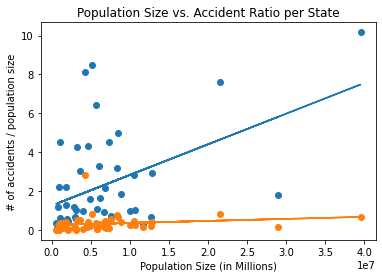

In [220]:
scatter_plot(scatter_data_fair, scatter_data_rain)